In [1]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import sbibm
import torch

from sbi.analysis import pairplot

plt.style.use('../plotting_settings.mplstyle')
# Colorblind color palette
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [2]:
# Get benchmark task to load observations
seed = torch.randint(100000, (1,)).item()

task = sbibm.get_task("ddm")
prior = task.get_prior_dist()
simulator = task.get_simulator(seed=seed) # Passing the seed to Julia.

In [42]:
with open("lan_10_11_posterior_samples_100x100iid.p", "rb") as fh:
    samples = pickle.load(fh)
samples_lan_11 = torch.stack(samples)

with open("lan_10_5_posterior_samples_100x100iid.p", "rb") as fh:
    samples = pickle.load(fh)
samples_lan_5 = torch.stack(samples)

with open("lan_10_6_posterior_samples_100x100iid.p", "rb") as fh:
    samples = pickle.load(fh)
samples_lan_6 = torch.stack(samples)

with open("lan_10_7_posterior_samples_100x100iid.p", "rb") as fh:
    samples = pickle.load(fh)
samples_lan_7 = torch.stack(samples)

with open("mnle_1000000_posterior_samples_100x100iid.p", "rb") as fh:
    samples = pickle.load(fh)
samples_mnle_6 = torch.stack(samples)

In [46]:
def get_posterior_metrics(reference_samples, samples, true_theta):

    # abs diff in posterior means
    mean_diff = (reference_samples.mean(0) - samples.mean(0)).abs()

    # abs diff variance
    var_diff = (reference_samples.var(0) - samples.var(0)).abs()

    # distance to true parameters, for each sample
    acc_samples = abs(samples - true_theta).mean(0)
    acc_reference = abs(reference_samples[:samples.shape[0]] - true_theta).mean(0)

    return mean_diff, var_diff, acc_samples, acc_reference

def plot_bar(pos, metrics, label, color, alpha=.6):
    plt.bar(
            pos, 
            height=metrics.mean(0), 
            width=width,
            yerr=metrics.std(0) / np.sqrt(metrics.shape[0]), 
            color = color,
            label=label,
            alpha=alpha,
            )
    

In [44]:
num_samples = 1000
metrics_lan_11 = torch.zeros(len(samples), 4, 4)
metrics_lan_5 = torch.zeros(len(samples), 4, 4)
metrics_lan_6 = torch.zeros(len(samples), 4, 4)
metrics_lan_7 = torch.zeros(len(samples), 4, 4)
metrics_mnle_6 = torch.zeros(len(samples), 4, 4)

for obsi in range(100):
    ref_samples = task.get_reference_posterior_samples(201+obsi)[:num_samples]
    true_theta = task.get_true_parameters(201+obsi)
    metrics_lan_11[obsi,] = torch.stack(get_posterior_metrics(
        ref_samples,
        samples_lan_11[obsi,], 
        true_theta)
        )
    metrics_lan_5[obsi,] = torch.stack(get_posterior_metrics(
        ref_samples,
        samples_lan_5[obsi,], 
        true_theta)
        )
    metrics_lan_6[obsi,] = torch.stack(get_posterior_metrics(
        ref_samples,
        samples_lan_6[obsi,], 
        true_theta)
        )
    metrics_lan_7[obsi,] = torch.stack(get_posterior_metrics(
        ref_samples,
        samples_lan_7[obsi,], 
        true_theta)
        )
    metrics_mnle_6[obsi,] = torch.stack(get_posterior_metrics(
        ref_samples,
        samples_mnle_6[obsi,], 
        true_theta)
        )
    

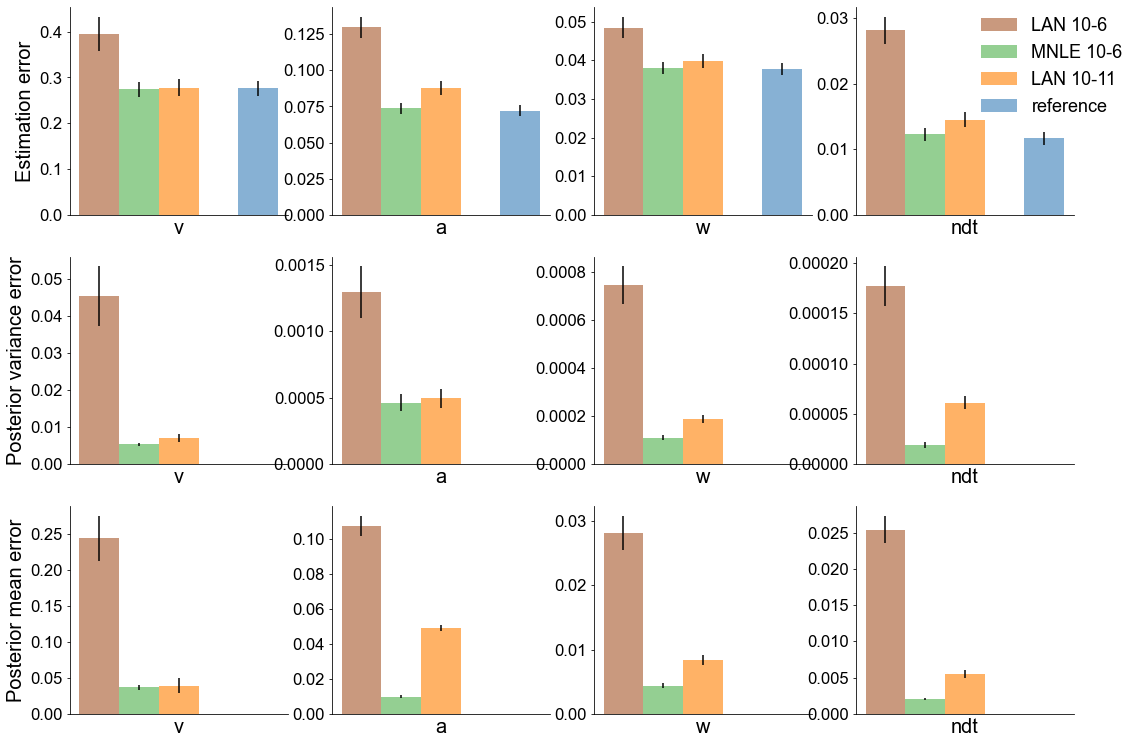

In [92]:
import numpy as np
fig, ax = plt.subplots(3, 4, figsize=(18, 13), sharey=False, sharex=True)
xlabels = ["v", "a", "w", "ndt"]
ylabels = ["Posterior mean error", "Posterior variance error", "Estimation error"]
width = 0.1
pos = 1.

for jj in range(3):  # metrics
    for ii in range(4):  # params
        plt.sca(ax[-jj-1, ii])
        # plot_bar(pos, metrics_lan_5[:, jj, ii], label="LAN 10-5", color=colors[3])
        plot_bar(pos+0.1, metrics_lan_6[:, jj, ii], label="LAN 10-6", color=colors[4])
        # plot_bar(pos+0.2, metrics_lan_7[:, jj, ii], label="LAN 10-7", color=colors[5])
        plot_bar(pos+0.2, metrics_mnle_6[:, jj, ii], label="MNLE 10-6", color=colors[2])
        plot_bar(pos+0.3, metrics_lan_11[:, jj, ii], label="LAN 10-11", color=colors[1])
        if jj==2:
            plot_bar(pos+0.5, metrics_lan_11[:, jj+1, ii], label="reference", color=colors[0])
        plt.xticks([])
        plt.xlabel(xlabels[ii])
        if ii==3 and jj==2:
            plt.legend(
                bbox_to_anchor=(.5, .4)
                )
        if ii==0:
            plt.ylabel(ylabels[jj])

/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],


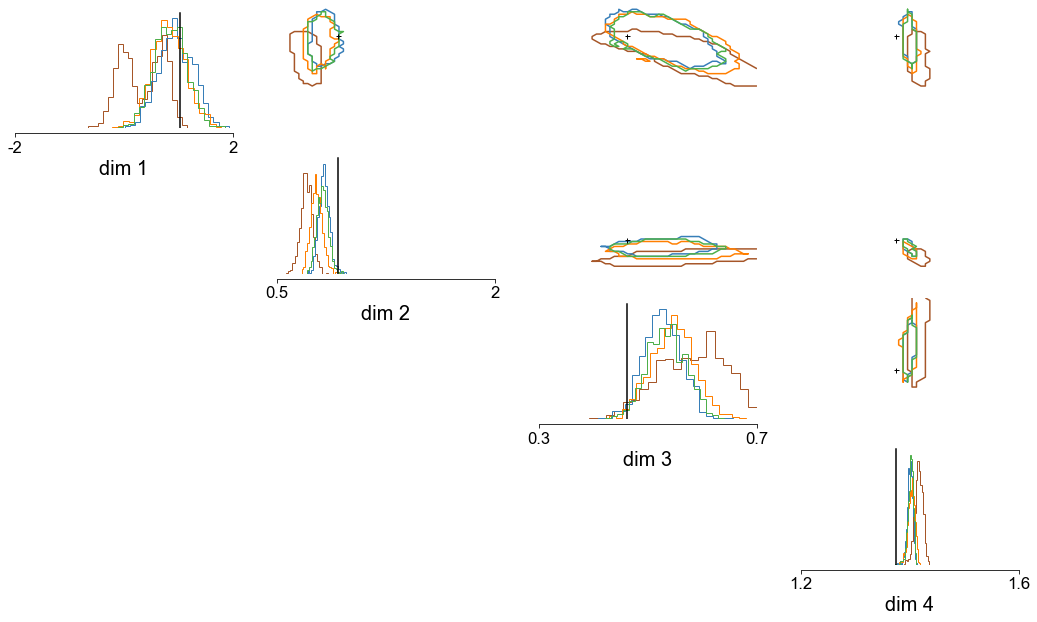

In [88]:
# Reference posterior for first obs in xos
obsi = 1
reference_samples = task.get_reference_posterior_samples(201+obsi)
true_theta = task.get_true_parameters(201+obsi)

fig, ax = pairplot(
    [
        samples_lan_6[obsi,],
        samples_mnle_6[obsi,],
        samples_lan_11[obsi,],
        reference_samples[:1000], 
    ], 
    samples_colors = colors[4:5] + colors[:3],
    upper="contour", 
    diag="hist",
    points=[true_theta], 
    points_offdiag=dict(marker="+", markersize=5),
    points_colors=["k"],
    figsize=(18, 10),
    hist_diag=dict(bins=20),
    contour_offdiag = dict(levels=[0.99]),
    limits=[[-2, 2], [0.5, 2.0], [.3, .7], [1.2, 1.6]], 
    ticks = [[-2, 2], [0.5, 2.0], [.3, .7], [1.2, 1.6]], 
);